In [29]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Chargement du dataset "df.csv"
df = pd.read_csv('df.csv', sep = ",")

#Chargement du modèle LightGBM "saved_model_v3.pkl"
with open('saved_model_v3.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
df_feature_importances_lightGBM = pd.DataFrame({
    'feature': df.columns.drop(['SK_ID_CURR', 'TARGET']), 
    'importance': model.feature_importances_ 
})

In [30]:
# Définir l'individu pour lequel tu veux afficher la feature importance
sk_id_curr = 100006

In [40]:
# Préparation des données pour SHAP
# On retire les colonnes non pertinentes (SK_ID_CURR, TARGET)
X = df.drop(columns=['SK_ID_CURR', 'TARGET'])

# Initialisation de l'explicateur SHAP
explainer = shap.TreeExplainer(model)

# Rechercher l'échantillon correspondant à l'individu
sample = df[df['SK_ID_CURR'] == sk_id_curr]

if sample.empty:
    print(f"L'individu avec SK_ID_CURR {sk_id_curr} n'a pas été trouvé.")
else:
    # Suppression des colonnes non pertinentes
    sample_X = sample.drop(columns=['SK_ID_CURR', 'TARGET'])

    # One-hot encoding des colonnes catégorielles (si nécessaire)
    sample_X = pd.get_dummies(sample_X)

    # Calcul des valeurs de SHAP pour cet individu
    shap_values = explainer.shap_values(sample_X)

    # Extraire les valeurs SHAP (puisqu'il y a une seule classe)
    shap_values_ind = shap_values[0]  # Les valeurs SHAP pour cet individu
    
    # Extraire les noms des caractéristiques
    feature_names = sample_X.columns

    # Séparer les variables impactant positivement et négativement
    # On extrait les indices des valeurs positives et négatives
    positive_impact = shap_values_ind > 0
    negative_impact = shap_values_ind < 0

    # Créer les DataFrames pour les variables impactant positivement et négativement
    df_positive_impact = pd.DataFrame({
        'feature': feature_names[positive_impact],
        'shap_value': shap_values_ind[positive_impact]
    }).sort_values(by='shap_value', ascending=False)

    df_negative_impact = pd.DataFrame({
        'feature': feature_names[negative_impact],
        'shap_value': shap_values_ind[negative_impact]
    }).sort_values(by='shap_value', ascending=True)

C:\Users\mathi\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


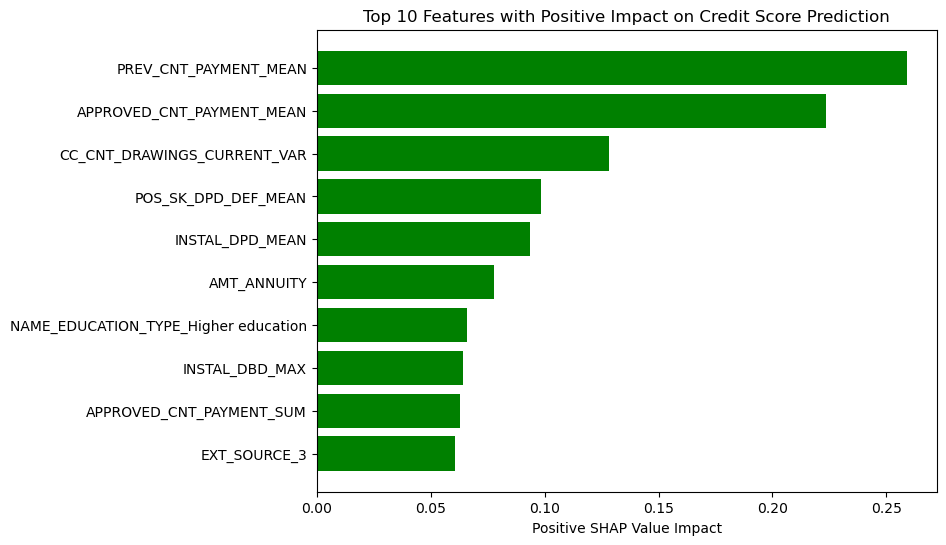

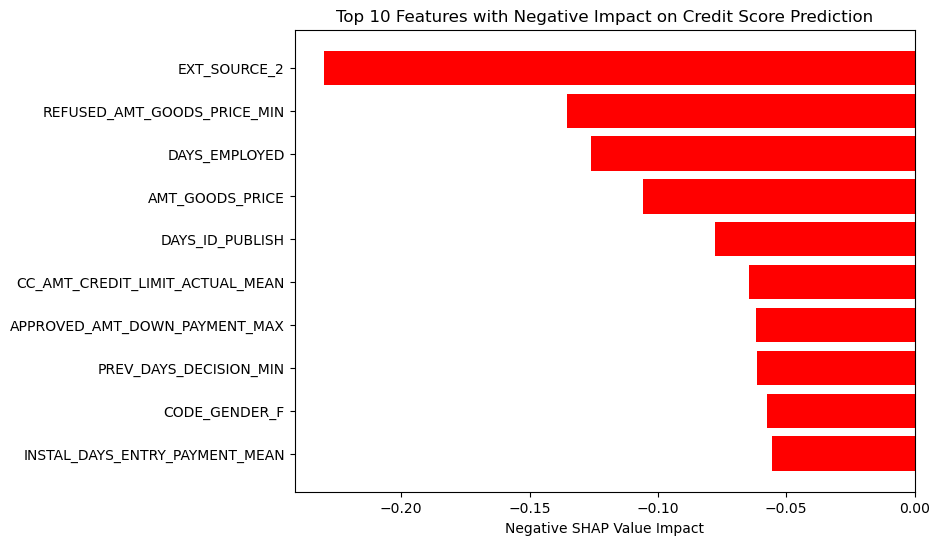

In [39]:
# Trier les DataFrames pour prendre les 10 plus grandes valeurs en termes de SHAP value
df_positive_impact_top10 = df_positive_impact.nlargest(10, 'shap_value')
df_negative_impact_top10 = df_negative_impact.nsmallest(10, 'shap_value')

# Plot the histogram for top 10 positive impact features
plt.figure(figsize=(8, 6))
plt.barh(df_positive_impact_top10['feature'], df_positive_impact_top10['shap_value'], color='green')
plt.xlabel('Positive SHAP Value Impact')
plt.title('Top 10 Features with Positive Impact on Credit Score Prediction')
plt.gca().invert_yaxis()  # Inverse l'axe y pour avoir les plus grandes valeurs en haut
plt.show()

# Plot the histogram for top 10 negative impact features
plt.figure(figsize=(8, 6))
plt.barh(df_negative_impact_top10['feature'], df_negative_impact_top10['shap_value'], color='red')
plt.xlabel('Negative SHAP Value Impact')
plt.title('Top 10 Features with Negative Impact on Credit Score Prediction')
plt.gca().invert_yaxis()  # Inverse l'axe y pour avoir les plus grandes valeurs négatives en haut
plt.show()